# Psychoinformatics - Week 5 (Exercises)
by boyonglin (r10945002@ntu.edu.tw)

## 進一步搜尋 Boy-Girl 版資訊 (8 points)

1. index.html 右上角 [< 上頁 ] 中包含了總頁數資訊，請用 LXML 抓出此經常變動的數字。(2 points)

In [ ]:
!pip install scrapy
!pip install bs4

In [91]:
from bs4 import BeautifulSoup as BS
import requests
import re

def get_pages(URI):
    r = requests.get(URI)
    s = BS(r.text, 'html.parser')
    for link in s.find_all('a'):
        if link.string == '‹ 上頁':
            href = link.get('href')
            pages = int(re.search(r'\d+', href).group())
    return s, pages

s, pages = get_pages("https://www.ptt.cc/bbs/Boy-Girl")

print('Total pages in Boy-Girl:', pages + 1)

Total pages in Boy-Girl: 6191


2. 請用 LXML 找出距離現在時間最近的一篇[爆]文標題與 URN (有可能需要翻頁) 。(3 points)

In [132]:
URI = "https://www.ptt.cc/bbs/Boy-Girl"
s, page = get_pages(URI)

target_found = False

while page > 0:
    for element in s.find_all(class_='nrec', string='爆'):
        title_element = element.find_next_sibling(class_='title')
        page_string = f'(/index{page}.html)'
        print(element.string, title_element.text.strip(), page_string)
        target_found = True

    if target_found:
        break
    else:
        page -= 1

    URI = "https://www.ptt.cc/bbs/Boy-Girl" + '/index' + str(page) + '.html'
    r = requests.get(URI)
    s = BS(r.text)



爆 [討論] 被說玩奈良的行程在亂排 (/index6185.html)


3. 請用 Selenium 在 index.html 往前翻三頁，每頁拍一張照片，在notebook內顯示。(3 points)

In [ ]:
!pip install selenium

In [128]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By

URI='https://www.ptt.cc/bbs/Boy-Girl/'
driver=webdriver.Edge(service=Service("./msedgedriver.exe"))
driver.get(URI)

for i in range(3):
    btn=driver.find_element(By.XPATH, "//*[text()='‹ 上頁']")
    btn.click()
    driver.save_screenshot(f'index-{i + 1}.png')

driver.close()

# print(driver.page_source)

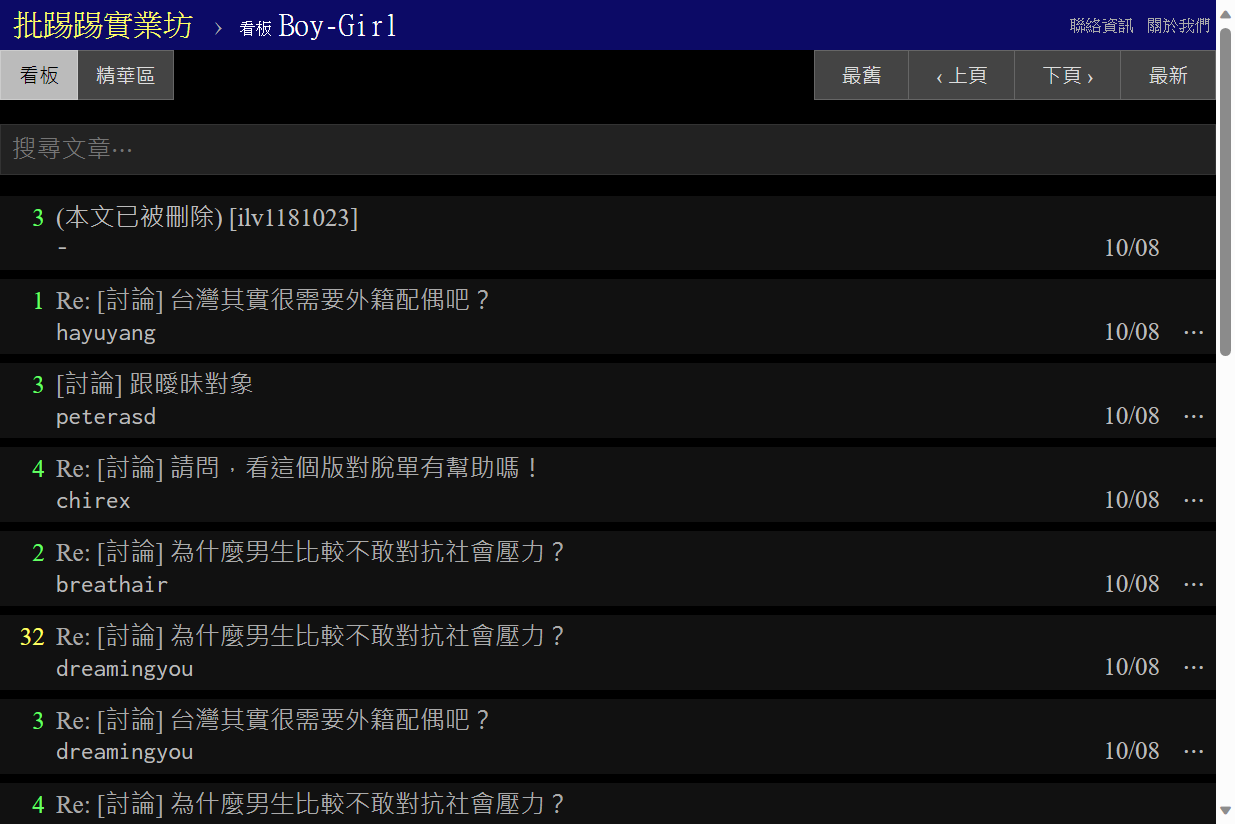

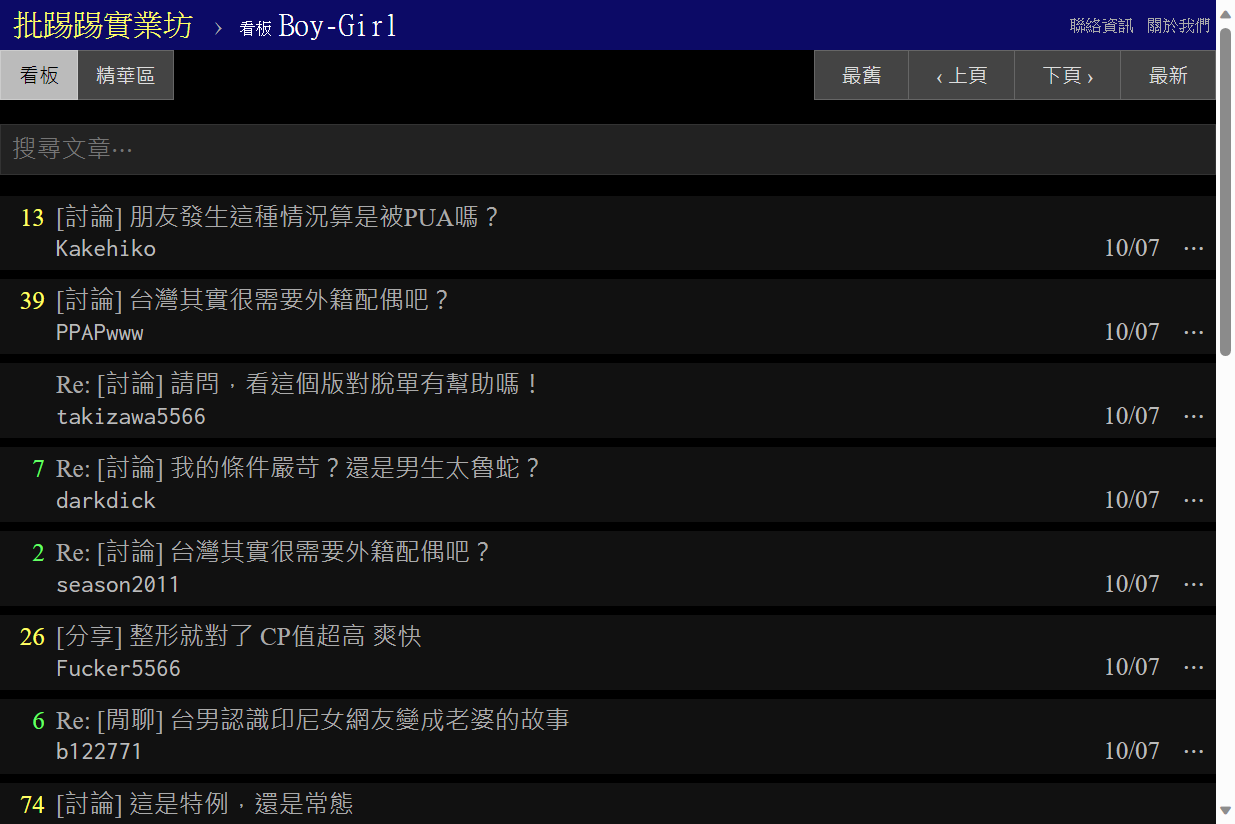

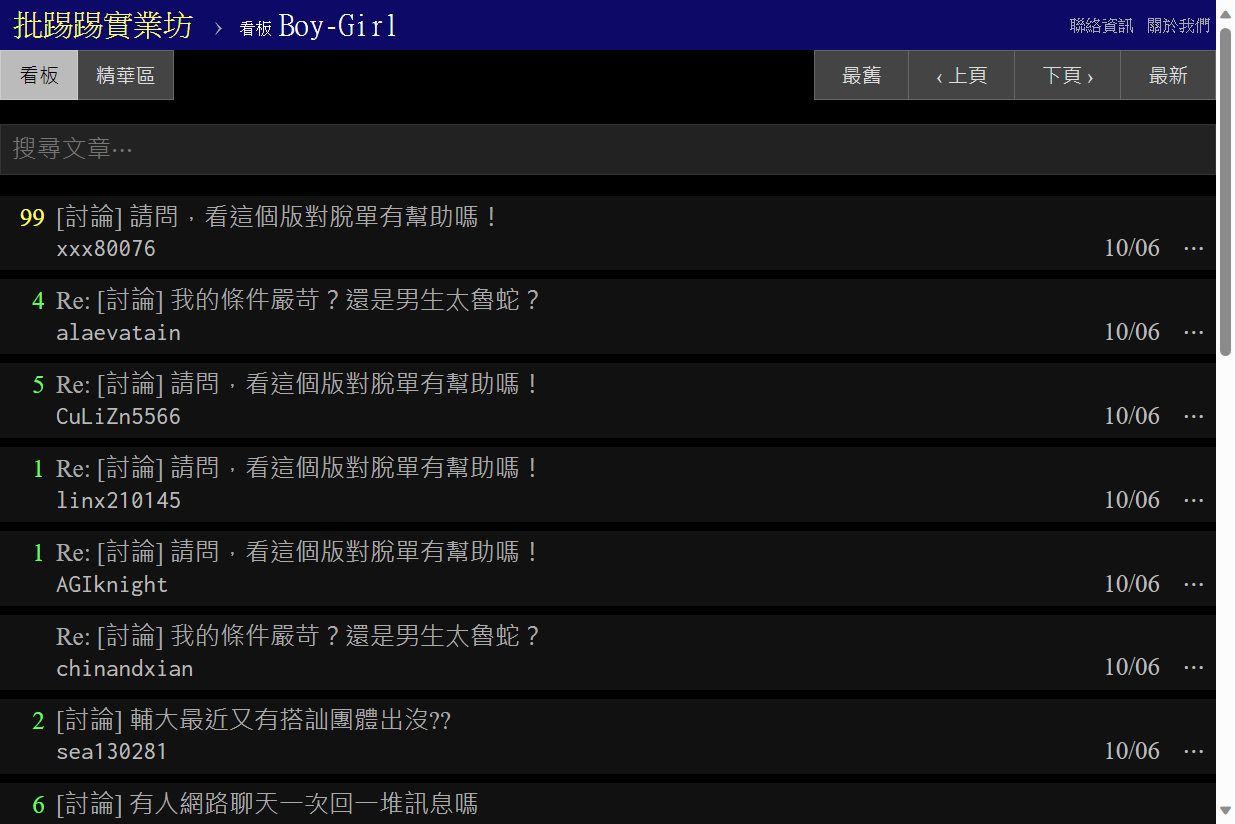

In [131]:
from IPython.display import Image, display

image1 = Image(filename="./index-1.png")
image2 = Image(filename="./index-2.png")
image3 = Image(filename="./index-3.png")

display(image1)
display(image2)
display(image3)

### Please submit your Jupyter Notebook in PDF before next Friday (10/13/2023).